<a href="https://colab.research.google.com/github/saadatialirezam-create/bioinformatics-project/blob/main/geometric_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
with open('/content/drive/MyDrive/brain_tumor_lists_resized.pkl', 'rb') as f:
    data = pickle.load(f)

notumor_imgs_resized = data['notumor']
pituitary_imgs_resized = data['pituitary']
meningioma_imgs_resized = data['meningioma']
glioma_imgs_resized = data['glioma']

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def augment_one(img):
    h, w = img.shape[:2]
    choice = np.random.randint(0, 4)  # 0..

    # 0) Rotation
    if choice == 0:
        if np.random.rand() < 0.5:
            angle = np.random.uniform(10, 15)
        else:
            angle = np.random.uniform(-15, -10)

        M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1.0)
        out = cv2.warpAffine(img, M, (w, h), borderMode=cv2.BORDER_REFLECT_101)
        return out, f"Rotation ({angle:.1f}°)"

    # 1) Shift
    if choice == 1:
        frac_x = np.random.uniform(0.05, 0.08)
        frac_y = np.random.uniform(0.05, 0.08)

        dx = frac_x * w
        dy = frac_y * h

        if np.random.rand() < 0.5:
            dx = -dx
        if np.random.rand() < 0.5:
            dy = -dy

        M = np.float32([[1, 0, dx],
                        [0, 1, dy]])
        out = cv2.warpAffine(img, M, (w, h), borderMode=cv2.BORDER_REFLECT_101)
        return out, f"Shift (dx={dx:.1f}, dy={dy:.1f})"

    # 2) Zoom
    if choice == 2:
        if np.random.rand() < 0.5:
            scale = np.random.uniform(1.05, 1.10)
        else:
            scale = np.random.uniform(0.90, 0.95)

        cx, cy = w/2, h/2
        M = np.float32([[scale, 0, (1-scale)*cx],
                        [0, scale, (1-scale)*cy]])
        out = cv2.warpAffine(img, M, (w, h), borderMode=cv2.BORDER_REFLECT_101)
        return out, f"Zoom (scale={scale:.3f})"

    # 3) Contrast
    if np.random.rand() < 0.5:
        factor = np.random.uniform(1.05, 1.10)
    else:
        factor = np.random.uniform(0.90, 0.95)

    img_f = img.astype(np.float32)
    mean = img_f.mean()
    out = mean + factor * (img_f - mean)
    out = np.clip(out, 0, 255).astype(np.uint8)
    return out, f"Contrast (factor={factor:.3f})"

def build_geometric_list(img_list):

    augmented = []
    op_names = []
    for img in img_list:
        aug, name = augment_one(img)
        augmented.append(aug)
        op_names.append(name)
    return augmented, op_names

In [4]:
notumor_imgs_geometric, notumor_ops = build_geometric_list(notumor_imgs_resized)
pituitary_imgs_geometric, pituitary_ops = build_geometric_list(pituitary_imgs_resized)
meningioma_imgs_geometric, meningioma_ops = build_geometric_list(meningioma_imgs_resized)
glioma_imgs_geometric, glioma_ops = build_geometric_list(glioma_imgs_resized)

print("notumor:", len(notumor_imgs_resized), "->", len(notumor_imgs_geometric))
print("pituitary:", len(pituitary_imgs_resized), "->", len(pituitary_imgs_geometric))
print("meningioma:", len(meningioma_imgs_resized), "->", len(meningioma_imgs_geometric))
print("glioma:", len(glioma_imgs_resized), "->", len(glioma_imgs_geometric))

notumor: 1595 -> 1595
pituitary: 1457 -> 1457
meningioma: 1339 -> 1339
glioma: 1321 -> 1321


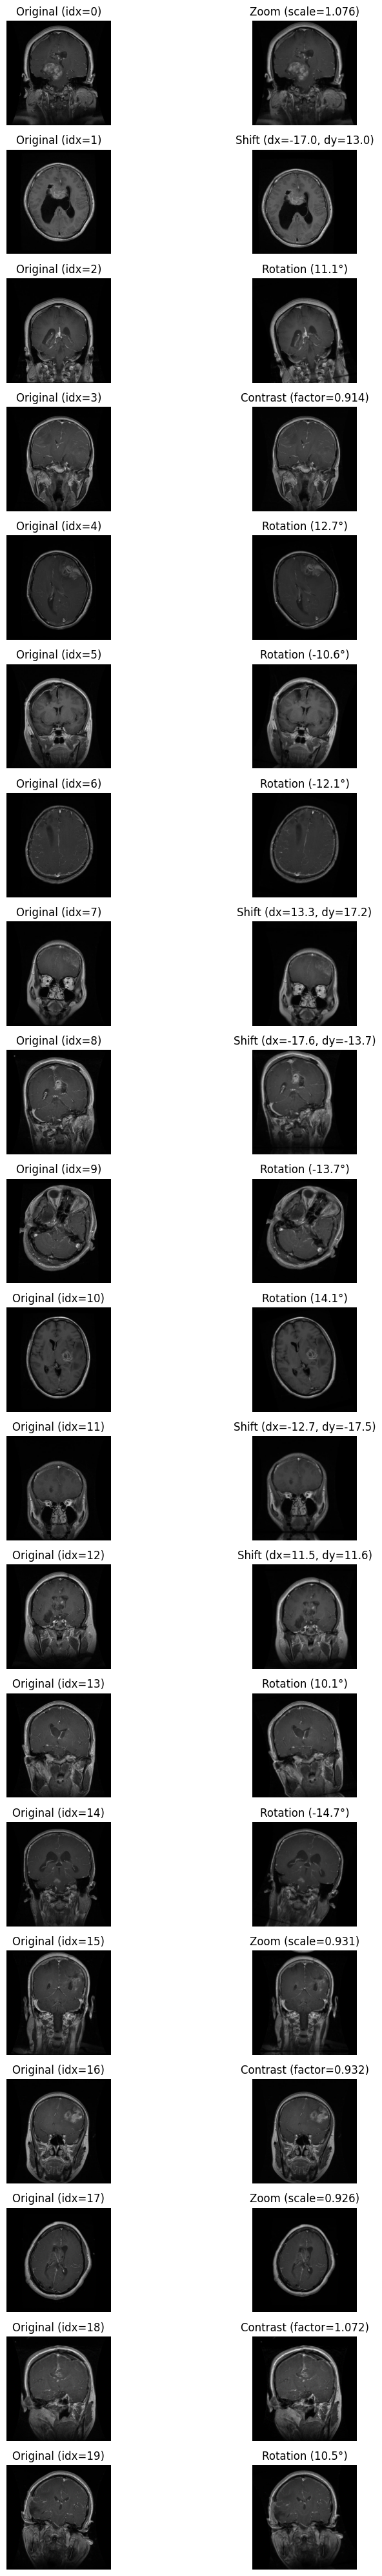

In [5]:
n_show = 20
plt.figure(figsize=(10, 2*n_show))

for row in range(n_show):
    orig = glioma_imgs_resized[row]
    aug  = glioma_imgs_geometric[row]
    name = glioma_ops[row]

    ax1 = plt.subplot(n_show, 2, row*2 + 1)
    ax1.imshow(orig)
    ax1.set_title(f"Original (idx={row})")
    ax1.axis("off")

    ax2 = plt.subplot(n_show, 2, row*2 + 2)
    ax2.imshow(aug)
    ax2.set_title(name)
    ax2.axis("off")

plt.tight_layout()
plt.show()

In [6]:
notumor_imgs_geometric_x2 = notumor_imgs_geometric + notumor_imgs_resized
pituitary_imgs_geometric_x2 = pituitary_imgs_geometric + pituitary_imgs_resized
meningioma_imgs_geometric_x2 = meningioma_imgs_geometric + meningioma_imgs_resized
glioma_imgs_geometric_x2 = glioma_imgs_geometric + glioma_imgs_resized

print(len(notumor_imgs_geometric_x2), "->", len(notumor_imgs_resized))
print(len(pituitary_imgs_geometric_x2), "->", len(pituitary_imgs_resized))
print(len(meningioma_imgs_geometric_x2), "->", len(meningioma_imgs_resized))
print(len(glioma_imgs_geometric_x2), "->", len(glioma_imgs_resized))

3190 -> 1595
2914 -> 1457
2678 -> 1339
2642 -> 1321


In [ ]:
import pickle

data = {
    'notumor': notumor_imgs_geometric_x2,
    'pituitary': pituitary_imgs_geometric_x2,
    'meningioma': meningioma_imgs_geometric_x2,
    'glioma': glioma_imgs_geometric_x2
}

with open('/content/drive/MyDrive/brain_tumor_lists_geometric.pkl', 'wb') as f:
    pickle.dump(data, f)